# Data preprocess for Mann-E

## Importing necessary libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import cv2
from PIL import Image

## Importing the dataset to the notebook

In [3]:
df = pd.read_csv('mj250k.csv')

In [4]:
df.head(10)

,Unnamed: 0,timestamp,_message,_thumb_url,img_url
0,0,2022-06-20T23:53:53.545000+00:00,**Bill Sienkiewicz technology | Jack Kirby mac...,https://cdn.discordapp.com/attachments/9880286...,https://media.discordapp.net/attachments/98802...
1,1,2022-06-20T23:52:58.907000+00:00,**<https://s.mj.run/vN6ggUx7POc> --ar 9:16** -...,https://cdn.discordapp.com/attachments/9862635...,https://media.discordapp.net/attachments/98626...
2,2,2022-06-20T23:52:33.916000+00:00,**Bill Sienkiewicz technology | Jack Kirby mac...,https://cdn.discordapp.com/attachments/9880286...,https://media.discordapp.net/attachments/98802...
3,3,2022-06-20T23:52:31.313000+00:00,**Bill Sienkiewicz technology | Jack Kirby mac...,https://cdn.discordapp.com/attachments/9880286...,https://media.discordapp.net/attachments/98802...
4,4,2022-06-20T23:52:19.600000+00:00,**<https://s.mj.run/QIgF9-KsZaU> cats with man...,https://cdn.discordapp.com/attachments/9829902...,https://media.discordapp.net/attachments/98299...
5,5,2022-06-20T23:52:05.430000+00:00,**bent twisted impossible shape mysterious for...,https://cdn.discordapp.com/attachments/9880286...,https://media.discordapp.net/attachments/98802...
6,6,2022-06-20T23:51:54.179000+00:00,**<https://s.mj.run/QIgF9-KsZaU> cats with man...,https://cdn.discordapp.com/attachments/9829902...,https://media.discordapp.net/attachments/98299...
7,7,2022-06-20T23:51:44.679000+00:00,**<https://s.mj.run/eejPAL0v0Lc> --ar 9:16** -...,https://cdn.discordapp.com/attachments/9862635...,https://media.discordapp.net/attachments/98626...
8,8,2022-06-20T23:51:18.211000+00:00,**<https://s.mj.run/eejPAL0v0Lc> --ar 9:16** -...,https://cdn.discordapp.com/attachments/9862635...,https://media.discordapp.net/attachments/98626...
9,9,2022-06-20T23:49:35.971000+00:00,**<https://s.mj.run/eejPAL0v0Lc> --ar 9:16** -...,https://cdn.discordapp.com/attachments/9862635...,https://media.discordapp.net/attachments/98626...


### Dropping the "Unnamed"

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df.head()

,timestamp,_message,_thumb_url,img_url
0,2022-06-20T23:53:53.545000+00:00,**Bill Sienkiewicz technology | Jack Kirby mac...,https://cdn.discordapp.com/attachments/9880286...,https://media.discordapp.net/attachments/98802...
1,2022-06-20T23:52:58.907000+00:00,**<https://s.mj.run/vN6ggUx7POc> --ar 9:16** -...,https://cdn.discordapp.com/attachments/9862635...,https://media.discordapp.net/attachments/98626...
2,2022-06-20T23:52:33.916000+00:00,**Bill Sienkiewicz technology | Jack Kirby mac...,https://cdn.discordapp.com/attachments/9880286...,https://media.discordapp.net/attachments/98802...
3,2022-06-20T23:52:31.313000+00:00,**Bill Sienkiewicz technology | Jack Kirby mac...,https://cdn.discordapp.com/attachments/9880286...,https://media.discordapp.net/attachments/98802...
4,2022-06-20T23:52:19.600000+00:00,**<https://s.mj.run/QIgF9-KsZaU> cats with man...,https://cdn.discordapp.com/attachments/9829902...,https://media.discordapp.net/attachments/98299...


## Reviewing data of a row

In [18]:
row = df.iloc[2500]

In [19]:
row['_message']

'**/imagine oil painting of a cyberpunk city, by karl friedrich schinkel::10, bustling, crowded, shanty, tunnels, cyberpunk::2, futuristic:5, grunge::1.5, detailed:2, desaturated, gray, cloud shadows, daytime::2, soft lighting, low contrast, --no church::3 --no neon::3 --ar 16:9** - <@226282573326843904>'

In [20]:
row['img_url']

'https://media.discordapp.net/attachments/988356821842534460/988368125139505152/f318a246-e950-4bc4-8194-53106988fdf8_Stijn_imagine_oil_painting_of_a_cyberpunk_city_by_karl_friedrich_schinkel.png'

## Downloading and Showing a single image from a row

In [49]:
row = df.iloc[69000]

In [50]:
url = row['img_url']
url

'https://media.discordapp.net/attachments/985982631579648000/988398351219302430/e437e69d-57c7-463c-99a3-8e0fdfd168cb_fb01_A_realistic_inflatable_squid_god_with_cartoon_eyes_3d_vector_art.png'

In [25]:
response = requests.get(url)

In [37]:
from io import BytesIO

In [38]:
image = Image.open(BytesIO(response.content))

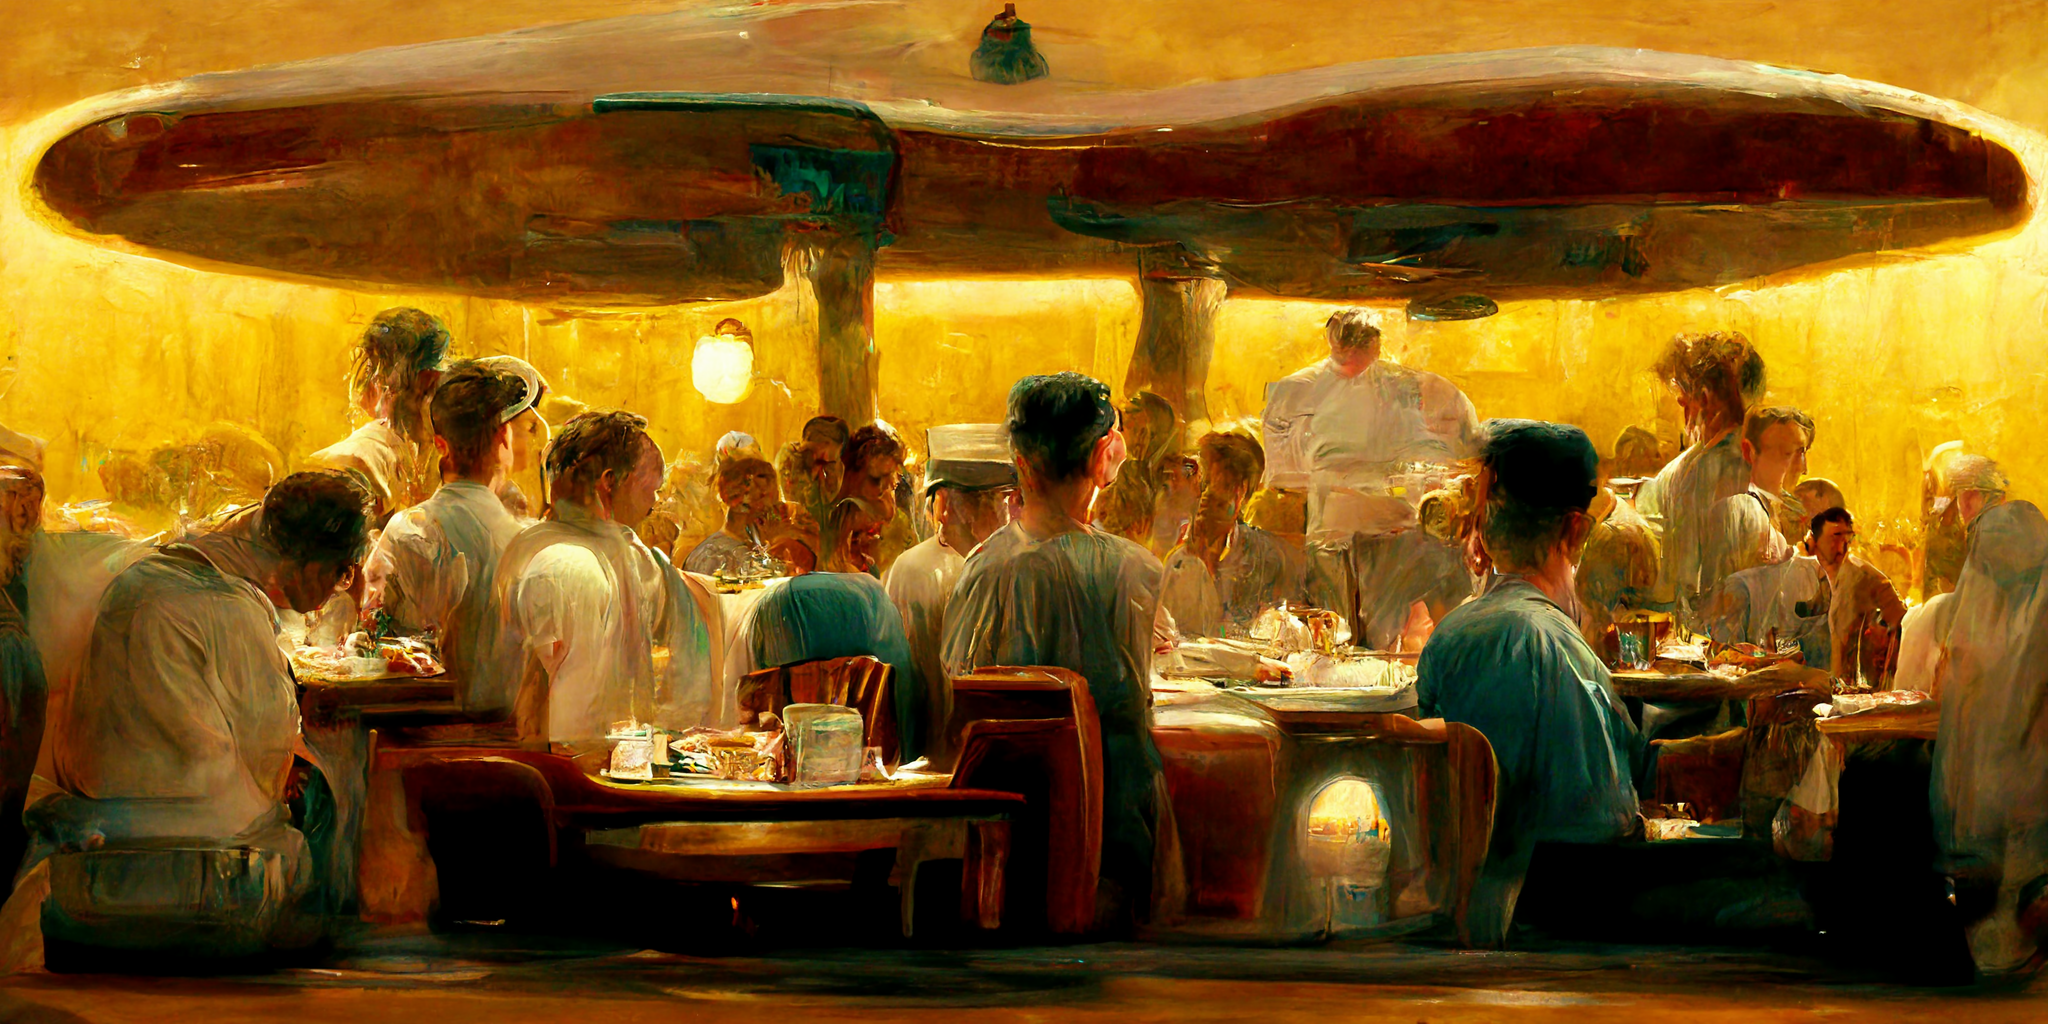

In [39]:
image

### The final function